In [6]:
import pandas as pd
import fpsnippets as fp
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

#Create the data fram from the .csv
asb = pd.read_csv("asbestos.csv", sep=",", low_memory=False)
nbhInfo = pd.read_csv("neighborhoods.csv", sep=",", low_memory=False)

#Add a column for the neighborhoods to be put
asb['neighborhood'] = ''

#Setting up the dictionaries for the amount of occurances in the asbestos.csv and the square milage of each neighborhood
nbhNums = dict()
nbhSqMiles = dict()

#Iterate through the dataframe and add the neighborhood based on coors, then zip if no coors
for index, row in asb.iterrows():
    outGeo = fp.geo_to_neighborhood(row['latitude'], row['longitude'])
    outZip = fp.zip_to_neighborhoods(row['z_code'])
    final = ""
    if outGeo != "None":
        final = outGeo
    elif outZip!= "None":
        final = outZip
    else:
        final = "None"
    
    asb.at[index, "neighborhood"] = final
    
    #Manages a dictionary that I use later for my data frame
    if not(final in nbhNums):
        nbhNums[final] = int(1)
    else:
        nbhNums[final] += int(1)

#Removes data points with no location data
del nbhNums[None]

#This pulls the square mile information for the various neighborhoods and puts them in a dictionary
for index, row in nbhInfo.iterrows():
        nbhSqMiles[row['hood']] = row['sqmiles']

#This takes a while to compile, so I have this message for the sake of my sanity
print("Data imported!")

Data imported!


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f76d91ae5b0>,
      dtype=object)

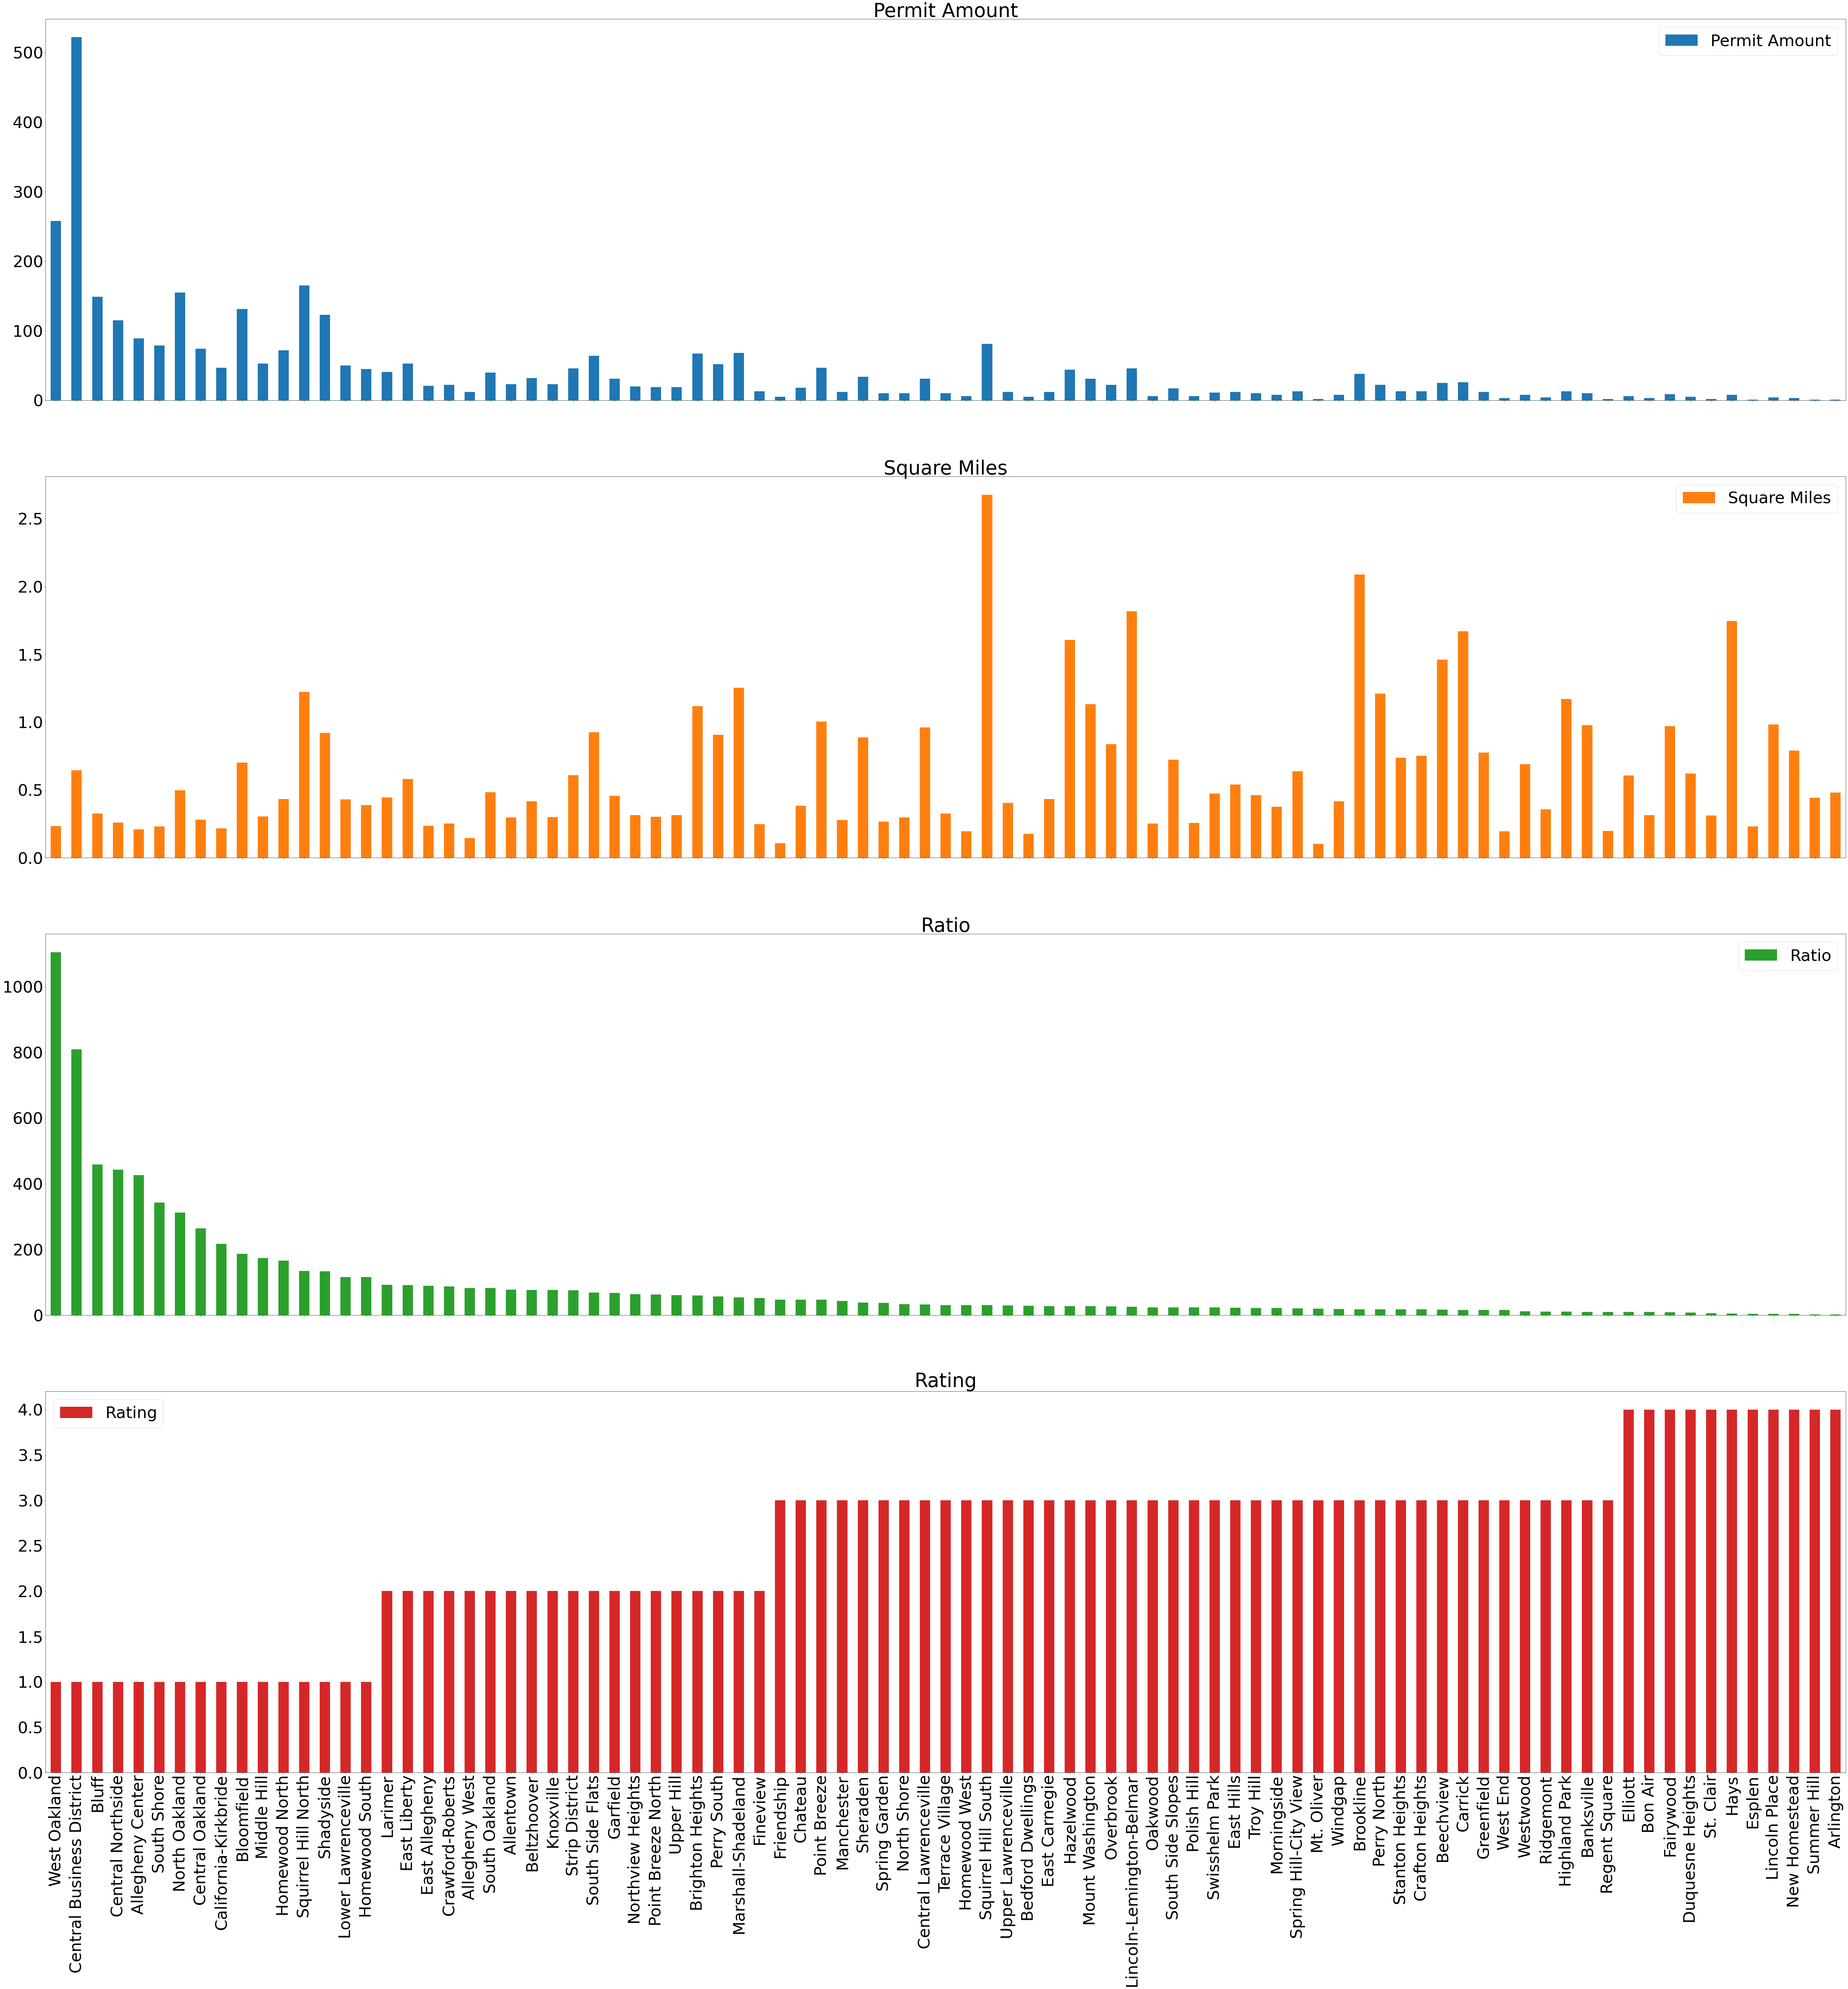

In [8]:
#This is for adjusting font size. Before I found this, the neighborhoods were unreadable
plt.rcParams.update({'font.size': 50})

#The final dataframe that I create from all the other previous dataframe and dictionaries
occur = pd.Series(nbhNums).sort_values(ascending=False).to_frame()

#Assigns the column name for the 1st set of data, then adds columns for the other data that will be added.
occur.columns =['Permit Amount']
occur['Square Miles'] = ''
occur['Ratio'] = ''
occur['Rating'] = ''

for index, row in occur.iterrows():
    #I determine the ratio by (amount of permits / square miles)
    ratio = row['Permit Amount']/float(nbhSqMiles[index])
    
    #I made a general tier system for the neighborhoods based off the calculated ratio
    if ratio>100:
        rate = 1
    elif (ratio>50):
        rate = 2
    elif (ratio>10):
        rate = 3
    else:
        rate = 4
    
    #This just fills in the rest of the data set as it iterates
    occur.at[index,'Rating'] = rate
    occur.at[index,'Square Miles'] = nbhSqMiles[index]
    occur.at[index,'Ratio'] = ratio

#I decided to use bar graphs for the time being, I may look into other types later. Figsize determines the dimensions, subplots makes a unique graph for each set of values in the frame.
occur.sort_values(by=['Ratio'], ascending=False).plot.bar(figsize=(100,100), subplots=True)